# Assignment 1(due on 12/06)

## Student:温承彦（12332279），Gtihub：WCY339

## 批改人：张鹏

## 得分：31/30

In [5]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature.nightshade import Nightshade
%matplotlib inline

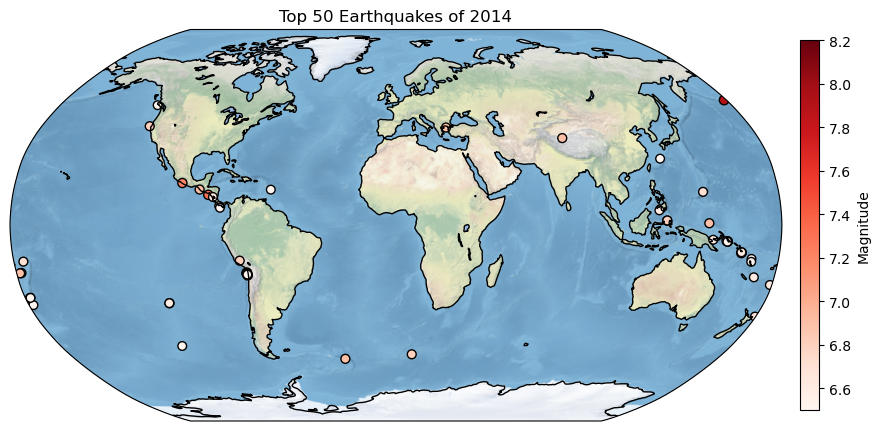

In [6]:
# 读取地震数据集
Sig_Eqs = pd.read_csv("usgs_earthquakes.csv")

# 从数据集中筛选出2014年的地震数据
Sig_Eqs['time'] = pd.to_datetime(Sig_Eqs['time'])
Sig_Eqs_2014 = Sig_Eqs[(Sig_Eqs['time'] >= '2014-01-01') & (Sig_Eqs['time'] < '2015-01-01')]

# 根据地震震级排序并取前50个
top_50_eqs = Sig_Eqs_2014.nlargest(50, 'mag')

# 设置画布和图坐标系，并添加世界地图背景
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.Robinson()})
ax.set_extent([-180, 180, -90, 90])  # 设置地图范围
ax.set_global()
ax.stock_img()

# 给地图添加特征
ax.add_feature(cfeature.COASTLINE)  # 添加海岸线
ax.add_feature(cfeature.LAND, edgecolor='black')  # 添加陆地，设置边缘颜色为黑色
ax.add_feature(cfeature.LAKES, edgecolor='black')  # 添加湖泊，设置边缘颜色为黑色
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor=cfeature.COLORS['water'])  # 添加海洋，设置边缘颜色为黑色，填充颜色为水蓝色


# 绘制地震点
sc = ax.scatter(top_50_eqs['longitude'], top_50_eqs['latitude'], c=top_50_eqs['mag'], cmap='Reds',
                marker='o', s=top_50_eqs['mag']*6, alpha=1, edgecolor='black', transform=ccrs.Geodetic())

# 添加颜色条，设置大小，颜色为红色
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, shrink=0.6)
cbar.set_label('Magnitude')

# 显示图形
plt.title('Top 50 Earthquakes of 2014')
plt.show()

### 第一题代码运行正常，可以输出正确的图像。
### 得分：10/10
### ----------------------------------------------------

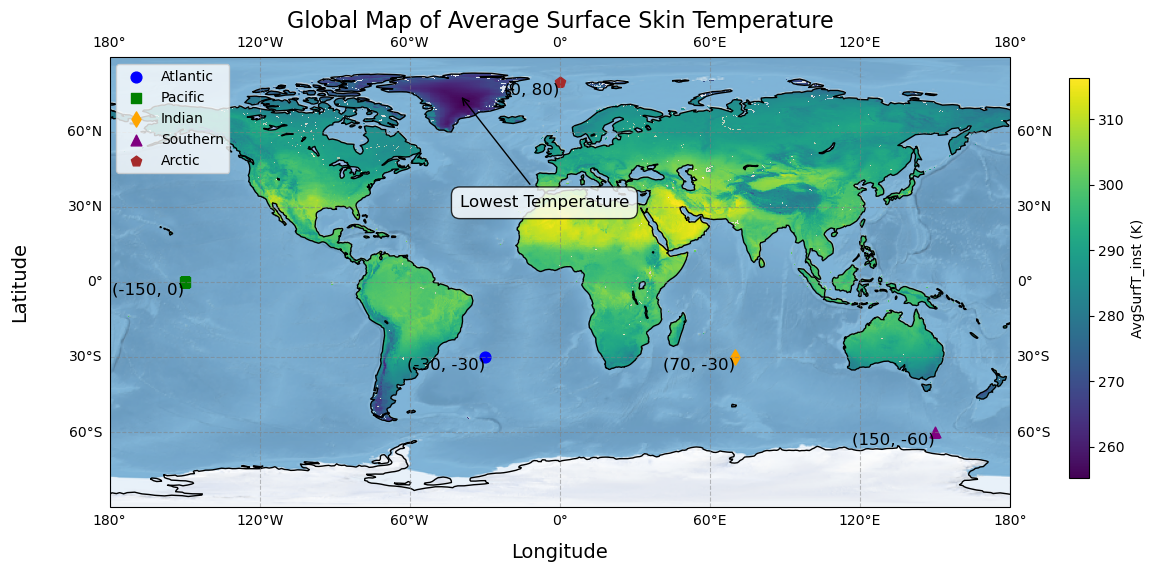

In [7]:
# 读取netCDF文件,将数据集储存在变量ds中
ds = xr.open_dataset("GLDAS_NOAH025_M.A202308.021.nc", engine="netcdf4")

# 提取变量地表平均温度
variable_name = 'AvgSurfT_inst'
variable = ds[variable_name].squeeze()

# 设置画布和图坐标系，创建具有指定投影PlateCarree的图和轴，并添加世界地图背景
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(14, 8))
ax.stock_img()

# 在地图上绘制全球地表平均温度
c = ax.pcolormesh(variable['lon'], variable['lat'], variable, cmap='viridis', transform=ccrs.PlateCarree())

# 给地图添加特征
ax.add_feature(cfeature.COASTLINE)  # 添加海岸线
ax.add_feature(cfeature.LAND, edgecolor='black')  # 添加陆地，设置边缘颜色为黑色
ax.add_feature(cfeature.LAKES, edgecolor='black')  # 添加湖泊，设置边缘颜色为黑色
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor=cfeature.COLORS['water'])  # 添加海洋，设置边缘颜色为黑色，填充颜色为水蓝色

# 标记五大洋并添加图例
oceans = {'Atlantic': (-30, -30, 'blue', 'o', 150), 'Pacific': (-150, 0, 'green', 's', 150),
          'Indian': (70, -30, 'orange', 'd', 150), 'Southern': (150, -60, 'purple', '^', 150),
          'Arctic': (0, 80, 'brown', 'p', 150)}
for ocean, (lon, lat, color, marker, size) in oceans.items():
    ax.scatter(lon, lat, color=color, marker=marker, label=ocean, transform=ccrs.PlateCarree(), s=60)
    ax.text(lon, lat, f'({lon}, {lat})', transform=ccrs.PlateCarree(), ha='right', va='top', fontsize=12)

# 添加x和y标签、刻度以及标题
ax.set_xlabel('Longitude')  
ax.set_ylabel('Latitude')  
ax.text(0.5, -0.1, 'Longitude', transform=ax.transAxes, ha='center', va='center', fontsize=14)
ax.text(-0.1, 0.5, 'Latitude', transform=ax.transAxes, ha='center', va='center', rotation='vertical', fontsize=14)
plt.title(f'Global Map of Average Surface Skin Temperature', fontsize=16)

# 添加网格线、图例以及颜色栏
ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)  # 添加网格线
ax.legend(loc='upper left')# 添加图例
cbar = plt.colorbar(c, ax=ax, orientation='vertical', pad=0.02, shrink=0.5)  # 调整colorbar大小
cbar.ax.set_position([0.81, 0.25, 0.02, 0.5])  # 调整Colorbar的位置
cbar.set_label(f'{variable_name} ({variable.units})')  # 设置colorbar标签

# 在图上添加注释以及文本框
plt.annotate('Lowest Temperature', xy=(-40, 75), xytext=(-40, 30),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
             fontsize=12, ha='left',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'), transform=ccrs.PlateCarree())
# 显示图形
plt.show()


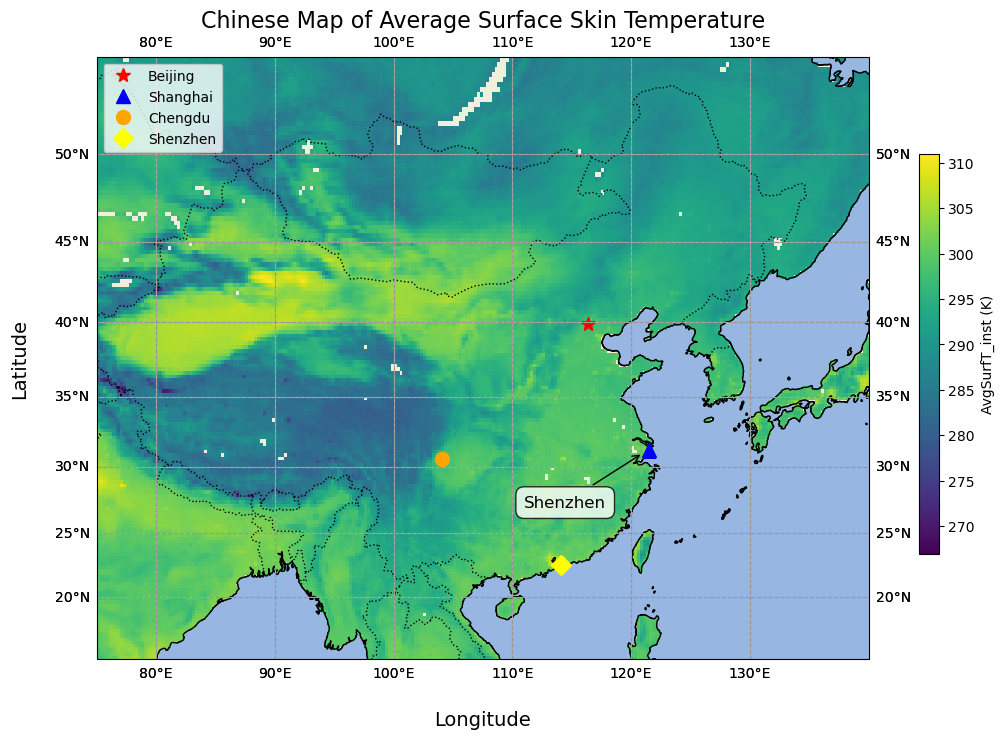

In [8]:
# 读取netCDF文件,将数据集储存在变量ds中
ds = xr.open_dataset("GLDAS_NOAH025_M.A202308.021.nc", engine="netcdf4")

# 提取变量地表平均温度
variable_name = 'AvgSurfT_inst'
variable = ds[variable_name].squeeze()

# 定义中国区域的经纬度范围
lon_range = slice(75, 140)  # 经度范围
lat_range = slice(15, 55)   # 纬度范围

# 提取中国区域的数据
variable_china = variable.sel(lon=lon_range, lat=lat_range)

# 设置画布和图坐标系，创建具有指定投影PlateCarree的图和轴
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Mercator()}, figsize=(12, 8))  # 更改投影方式和图幅大小

# 在地图上绘制中国区域数据
c = ax.pcolormesh(variable_china['lon'], variable_china['lat'], variable_china, cmap='viridis', transform=ccrs.PlateCarree())

# 给地图添加特征
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')

# 在地图上添加标记点（北京、上海、成都、深圳）并添加不同颜色和形状的标记
cities = {
    'Beijing': (116.4074, 39.9042, 'red', '*'),
    'Shanghai': (121.4737, 31.2304, 'blue', '^'),
    'Chengdu': (104.0668, 30.5728, 'orange', 'o'),
    'Shenzhen': (114.0579, 22.5431, 'yellow', 'D')
}

for city, (lon, lat, color, marker) in cities.items():
    ax.plot(lon, lat, marker, color=color, markersize=10, transform=ccrs.PlateCarree(), label=city)

# 添加x和y标签、刻度以及标题
ax.set_xlabel('Longitude')  # 添加x标签
ax.set_ylabel('Latitude')  # 添加y标签
ax.text(0.5, -0.1, 'Longitude', transform=ax.transAxes, ha='center', va='center', fontsize=14)
ax.text(-0.1, 0.5, 'Latitude', transform=ax.transAxes, ha='center', va='center', rotation='vertical', fontsize=14)
plt.title(f'Chinese Map of Average Surface Skin Temperature', fontsize=16)

# 添加网格线、图例以及颜色栏
ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)  # 添加网格线
ax.legend(loc='upper left')# 添加图例
cbar = plt.colorbar(c, ax=ax, orientation='vertical', pad=0.02, shrink=0.5)  # 调整colorbar大小
cbar.ax.set_position([0.81, 0.25, 0.02, 0.5])  # 调整Colorbar的位置
cbar.set_label(f'{variable_name} ({variable.units})')  # 设置colorbar标签

# 在图上添加注释以及文本框
plt.annotate('Shenzhen', xy=(121, 31), xytext=(111, 27),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
             fontsize=12, ha='left',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'), transform=ccrs.PlateCarree())

# 显示图形
plt.show()

### 第二题代码运行正常，可以输出正确图像，图像有多个数据点，色彩分明
### 得分：21/20